In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
from scipy.stats import zscore
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
file_id = "11UjHcl5EqQYA7EiKoI5ooVmAhWd--O1l"

download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

response = requests.get(download_url)

if response.status_code == 200:
    data = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
    print(data.head())

else:
    print(f"Download failed with status code {response.status_code}")

           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443       444       445 

In [34]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 450 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    hsi_id         500 non-null    object 
 1    0              500 non-null    float64
 2    1              500 non-null    float64
 3    2              500 non-null    float64
 4    3              500 non-null    float64
 5    4              500 non-null    float64
 6    5              500 non-null    float64
 7    6              500 non-null    float64
 8    7              500 non-null    float64
 9    8              500 non-null    float64
 10   9              500 non-null    float64
 11   10             500 non-null    float64
 12   11             500 non-null    float64
 13   12             500 non-null    float64
 14   13             500 non-null    float64
 15   14             500 non-null    float64
 16   15             500 non-null    float64
 17   16             500 non-null    fl

In [35]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


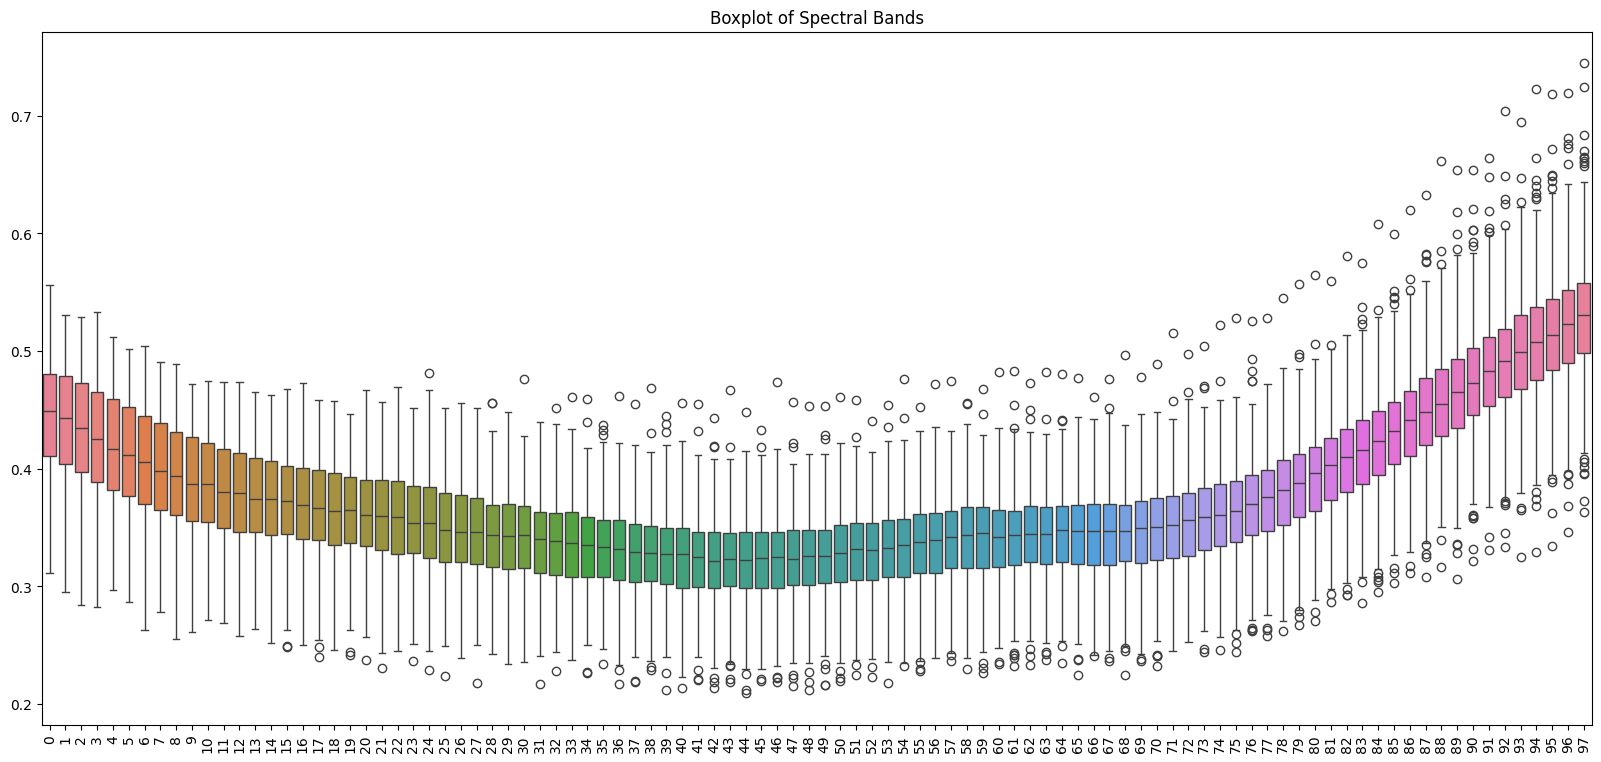

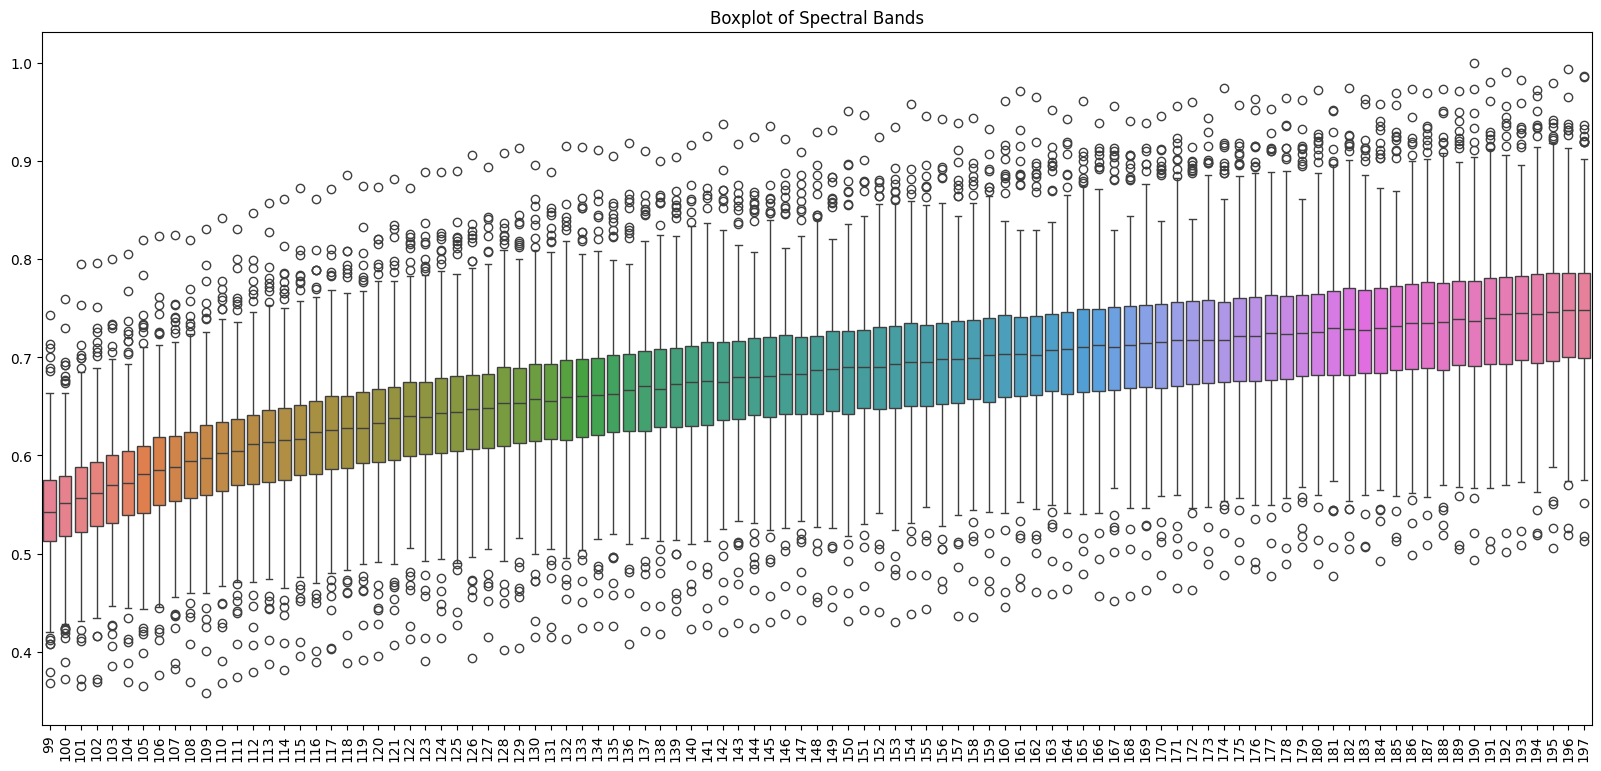

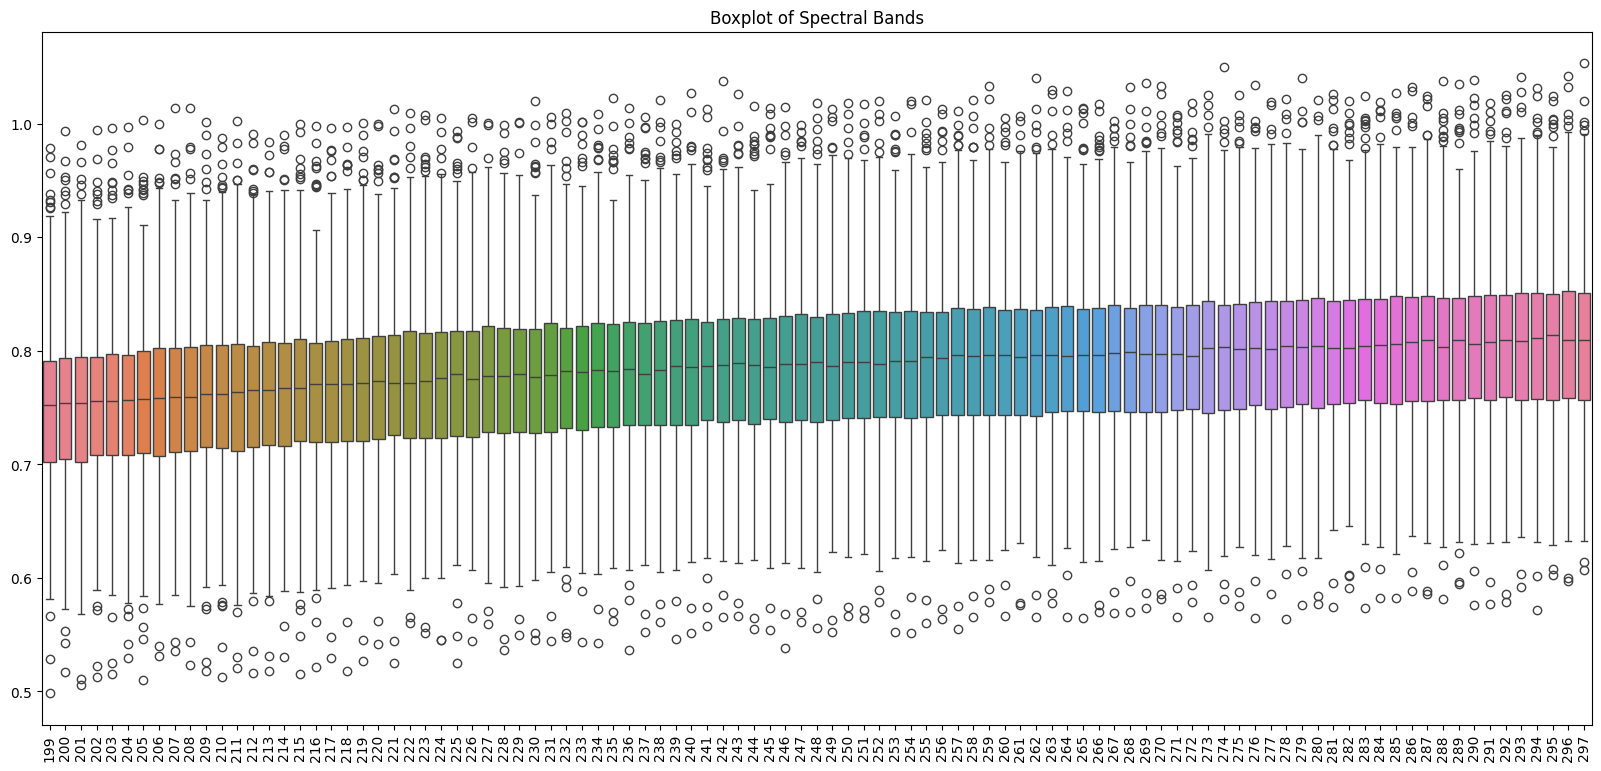

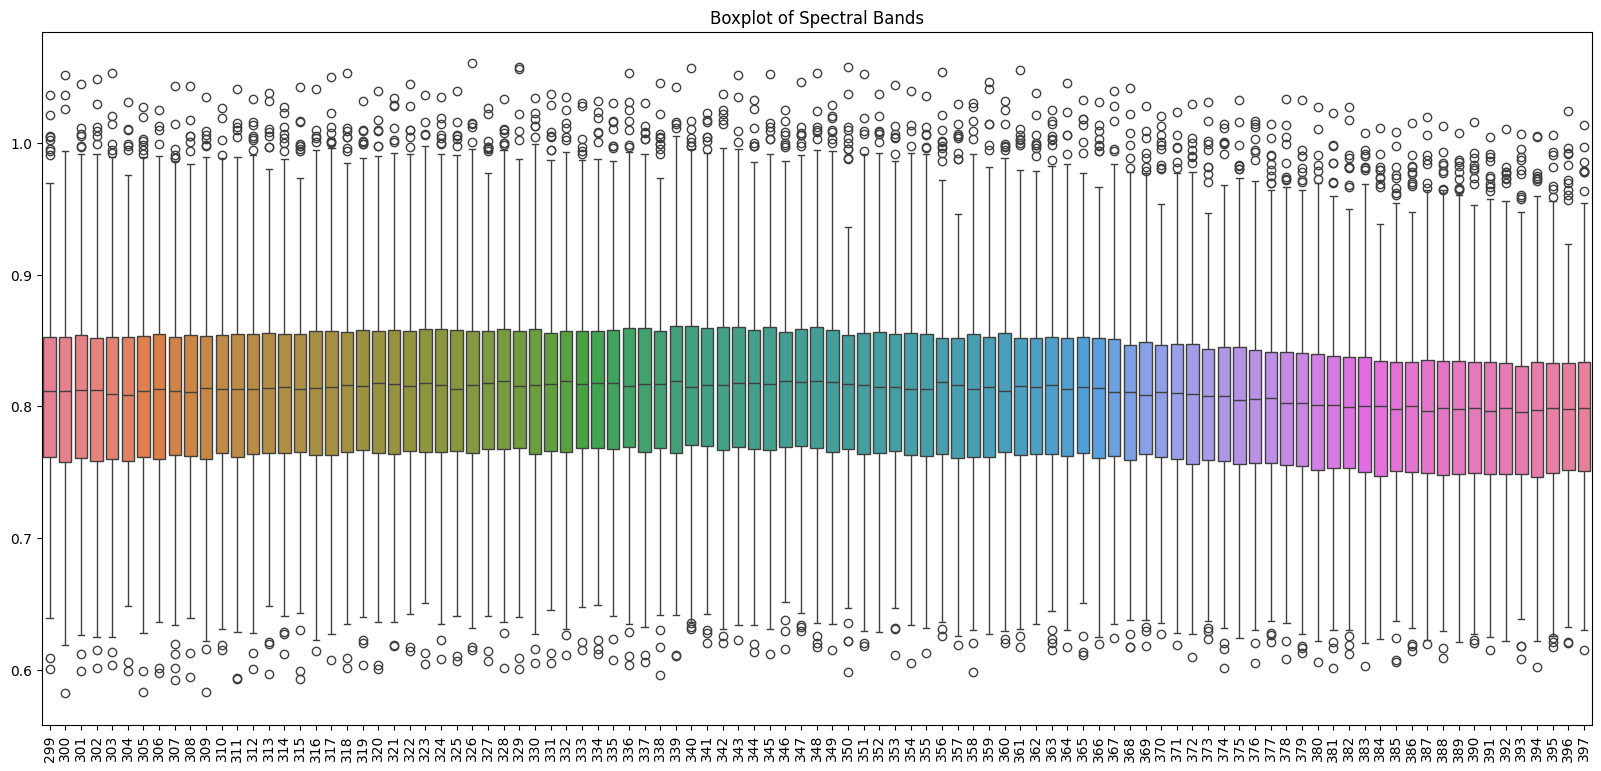

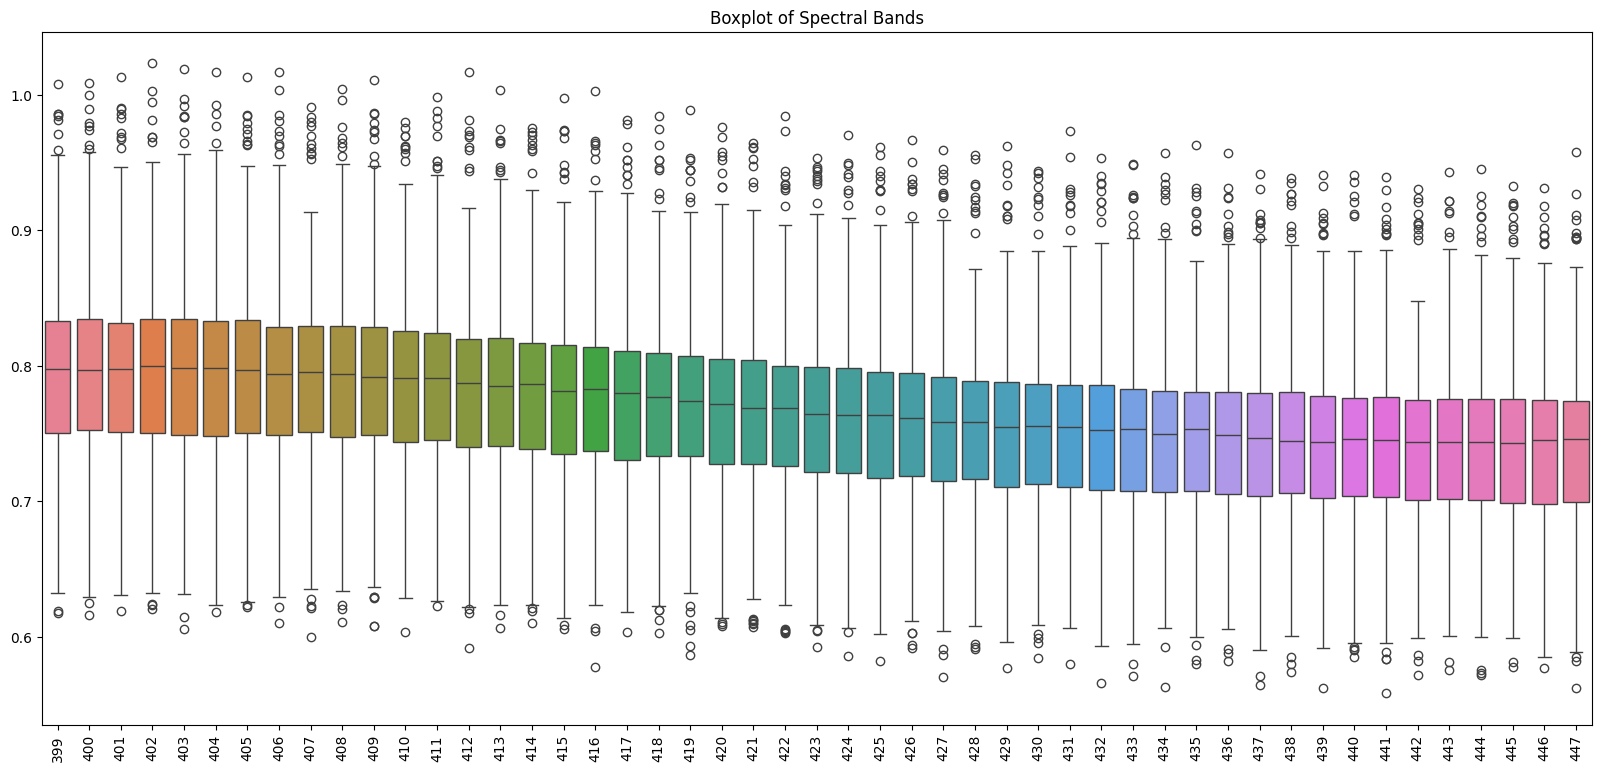

In [36]:
# Boxplot for a few spectral bands
plt.figure(figsize=(20, 9))
sns.boxplot(data=data.iloc[:, :99])
plt.xticks(rotation=90)
plt.title("Boxplot of Spectral Bands")
plt.show()

# Boxplot for a few spectral bands
plt.figure(figsize=(20, 9))
sns.boxplot(data=data.iloc[:, 100:199])
plt.xticks(rotation=90)
plt.title("Boxplot of Spectral Bands")
plt.show()


# Boxplot for a few spectral bands
plt.figure(figsize=(20, 9))
sns.boxplot(data=data.iloc[:, 200:299])
plt.xticks(rotation=90)
plt.title("Boxplot of Spectral Bands")
plt.show()

# Boxplot for a few spectral bands
plt.figure(figsize=(20, 9))
sns.boxplot(data=data.iloc[:, 300:399])
plt.xticks(rotation=90)
plt.title("Boxplot of Spectral Bands")
plt.show()

# Boxplot for a few spectral bands
plt.figure(figsize=(20, 9))
sns.boxplot(data=data.iloc[:, 400:449])
plt.xticks(rotation=90)
plt.title("Boxplot of Spectral Bands")
plt.show()

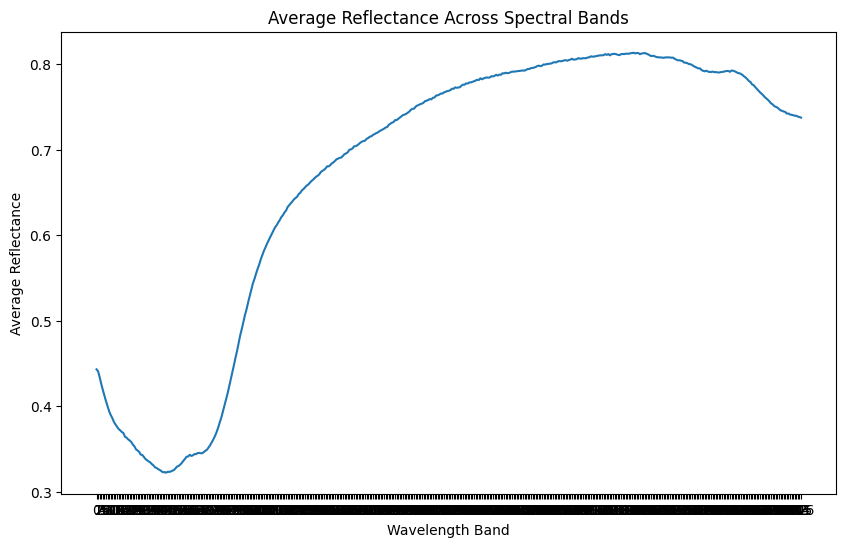

In [37]:
average_reflectance = data.iloc[:, 1:448].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_reflectance)
plt.xlabel('Wavelength Band')
plt.ylabel('Average Reflectance')
plt.title('Average Reflectance Across Spectral Bands')
plt.show()


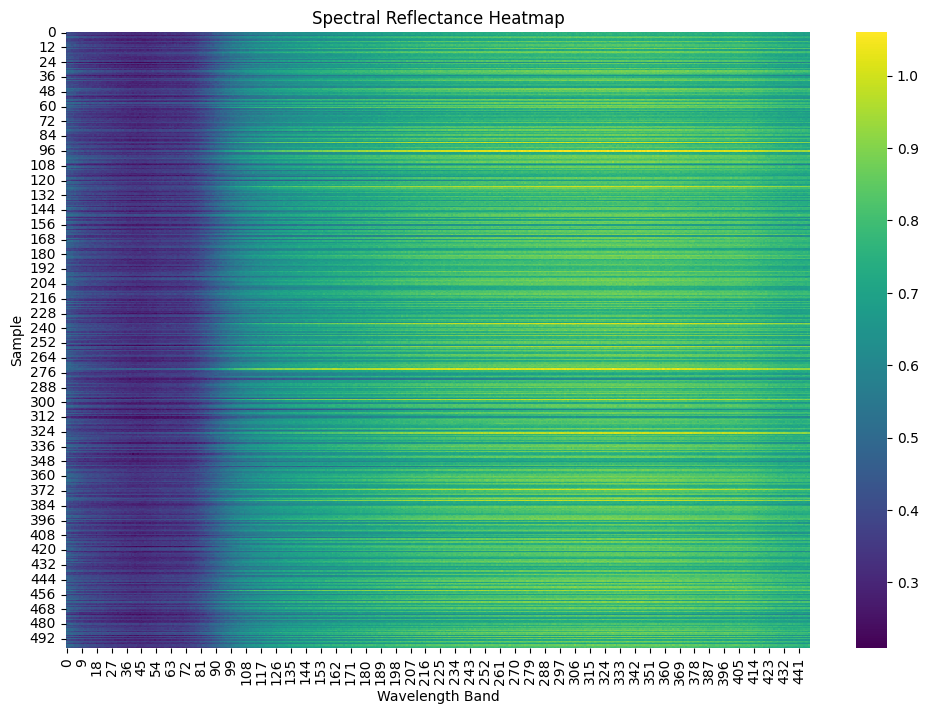

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.iloc[:, 1:449], cmap='viridis', cbar=True)
plt.xlabel('Wavelength Band')
plt.ylabel('Sample')
plt.title('Spectral Reflectance Heatmap')
plt.show()


In [39]:

# Calculating Z-scores for outliers
z_scores = data.iloc[:, 1:448].apply(zscore)

outliers = (z_scores.abs() > 3).any(axis=1)
data_outliers = data[outliers]

print(f"Number of outliers: {data_outliers.shape[0]}")


Number of outliers: 29


In [40]:
skewness_values = [skew(data.iloc[:, band]) for band in range(1, 448)]
average_skewness = np.mean(skewness_values)

print(f"Average Skewness Across All Bands: {average_skewness}")


Average Skewness Across All Bands: 0.014671007402024337


### Due to the low Skewness, I have applied standardiazaion(Skewness<1)

In [47]:
scaler = StandardScaler()
data.iloc[:,1:448]  = scaler.fit_transform(data.iloc[:,1:448])

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)


Explained variance by top 2 components: [0.90895114 0.93987413]


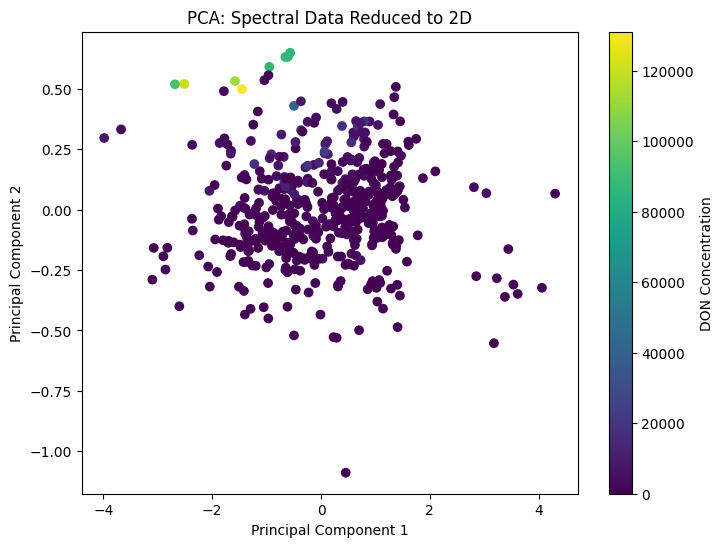

In [42]:
# Apply PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data.iloc[:, 1:448])

# Explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"Explained variance by top 2 components: {explained_variance[:2]}")


# 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['vomitoxin_ppb'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Spectral Data Reduced to 2D')
plt.colorbar(label='DON Concentration')
plt.show()


In [48]:
data.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,-0.602959,-0.965751,-0.543093,-1.157165,-0.742877,-1.052805,-1.138474,-1.291257,-1.128080,...,-0.579796,-0.435043,-0.472136,-0.641236,-0.807712,-0.858033,-0.499055,-0.738140,0.704520,1100.0
1,imagoai_corn_1,-0.611562,-0.831331,-0.683547,-0.654183,-0.480564,-0.510221,-0.678841,-0.826155,-0.462121,...,-1.071488,-0.811826,-0.715506,-0.814737,-0.726845,-1.145151,-0.766827,-0.759125,0.689054,1000.0
2,imagoai_corn_2,-1.210868,-1.529537,-1.328061,-1.135296,-1.277202,-1.403752,-1.618288,-1.577331,-1.492895,...,-1.089395,-1.333533,-1.437541,-1.186149,-1.183869,-1.546059,-1.470599,-1.231647,0.665176,1300.0
3,imagoai_corn_3,0.575693,0.714559,0.637270,0.721659,0.940964,1.060639,1.176304,0.638522,0.488863,...,0.028574,-0.186753,-0.068313,-0.181179,0.216860,-0.004504,0.076859,0.315411,0.733474,1300.0
4,imagoai_corn_4,0.900614,1.022832,0.772988,1.336847,0.992857,0.866564,1.177082,0.936845,0.737234,...,0.542282,0.600180,0.390096,0.442627,0.423396,0.098487,0.689182,0.422178,0.751988,220.0


In [ ]:
data_without_first_row = data.iloc[1:]




## Model Training

In [64]:
# Split data into features and target
X = data.iloc[:, 1:448]
y = data['vomitoxin_ppb']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=2000,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)
rf_model.fit(X_train, y_train)


# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")
print(X_train.shape)


MAE: 3627.569440895482
RMSE: 10691.904611540636
R^2 Score: 0.5910437121548319
(400, 447)


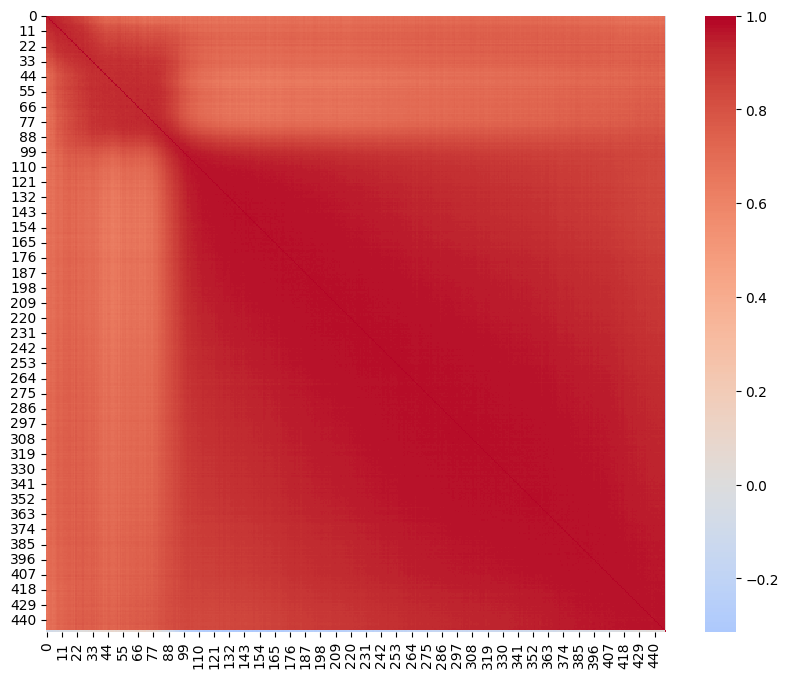

In [45]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])


corr_matrix = numeric_data.corr()

# Visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.show()

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras import models, layers, callbacks

# Assuming data shape (400, 447) and 64x64 spatial shape with 7 spectral bands
# Reshape if your spatial dimensions differ
try:
    X = data.iloc[:, 1:448].values.reshape(-1, 64, 64, 7, 1)  # 7 spectral bands as an example
except ValueError as e:
    print(f"Reshape error: {e}")

y = data['vomitoxin_ppb']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build optimized 3D CNN model
model = models.Sequential([
    layers.Conv3D(32, (3, 3, 3), activation='relu', padding='same', input_shape=(64, 64, 7, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling3D((2, 2, 2)),

    layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling3D((2, 2, 2)),

    layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling3D((2, 2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Predictions
y_pred = model.predict(X_test).flatten()

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


Reshape error: cannot reshape array of size 223500 into shape (64,64,7,1)


c:\Users\MEET\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(16, 447), dtype=float32). Expected shape (None, 64, 64, 7, 1), but input has incompatible shape (16, 447)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(16, 447), dtype=float32)
  • training=True
  • mask=None